In [624]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import animation

In [625]:
### import the example plot function
from RSS_assignment import plot_waterfall


### write read npz files

In [626]:
def readnpz(data,index=0):
    npz=np.load(data)
    files=npz.files
#     print(f"current files available{index}")   
    data=npz[files[index]]
    print(f"extracting file:{files[index]}")
    return(data)
data=readnpz('dataset_satellites.npz',0)
tel_az=readnpz('dataset_satellites.npz',1)
tel_el=readnpz('dataset_satellites.npz',2)
f_GHz=readnpz('dataset_satellites.npz',3)
mjd=readnpz('dataset_satellites.npz',4)
nchan=len(f_GHz)
# print(f_GHz.shape)
max_epoch=len(mjd)
tsamp=(mjd[1]-mjd[0])*24*3600
print(f"frequency range {np.min(f_GHz)} - {np.max(f_GHz)}, total channels {nchan}, total epoch {max_epoch}")
print(tsamp,(mjd[-1]-mjd[0])*24)
print(f_GHz[3])
def convertdbm(dbm):
    p=1*10**(dbm/10)
    return p ### mW
def changetodbm(p):
    dbm=10*np.log10(p)
    return dbm
    

extracting file:data
extracting file:telescope_az
extracting file:telescope_el
extracting file:f_GHz
extracting file:mjd
frequency range 10.0 - 13.0, total channels 3001, total epoch 36392
1.499988092109561 16.16005499800667
10.003


In [132]:
sat_az=readnpz('satellite_positions.npz',0)
sat_el=readnpz('satellite_positions.npz',1)
sat_range=readnpz('satellite_positions.npz',2)
print(f"number of satellites {sat_az.shape[1]}")

extracting file:sat_az
extracting file:sat_el
extracting file:sat_range
number of satellites 631


### Check out provided script

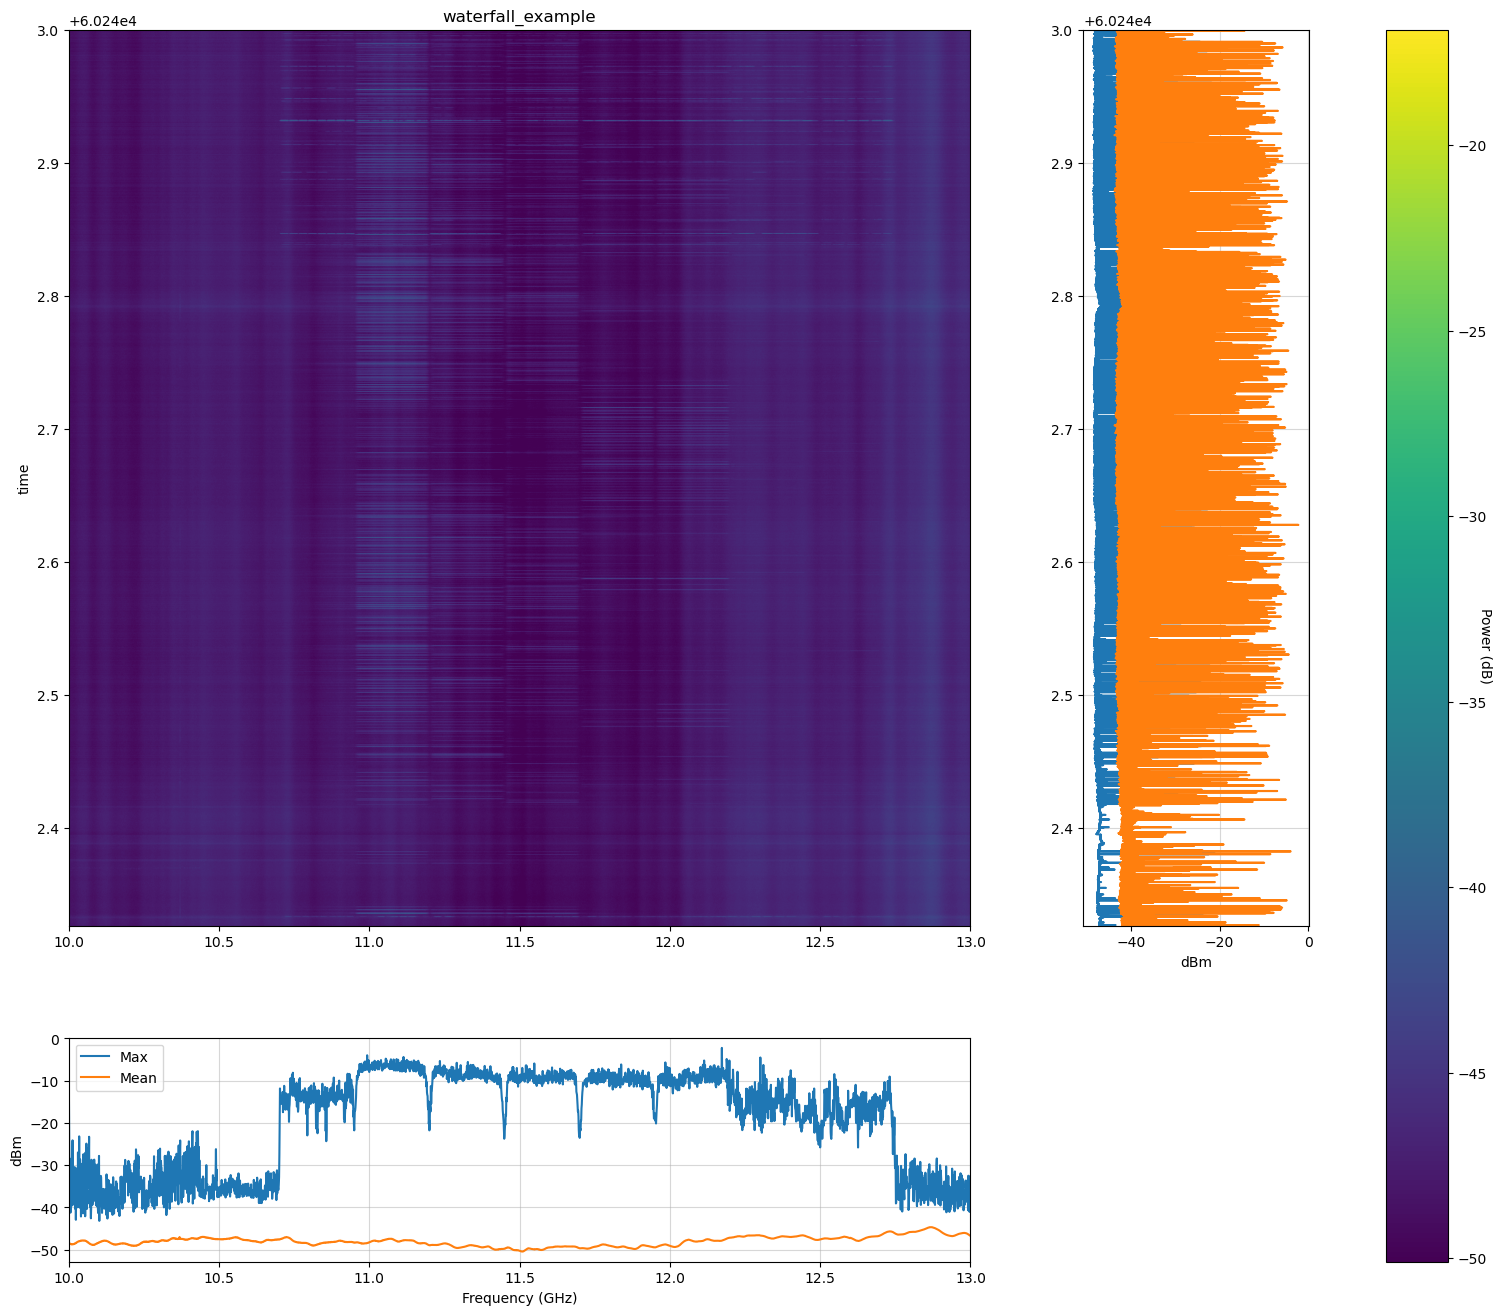

In [5]:
plot_waterfall(data,mjd,f_GHz,title='waterfall_example',savename='waterfall_example',savefig=True)
plt.show()

### plot telescope elevation and az, I think most satellites may be filtered due to elevation limit

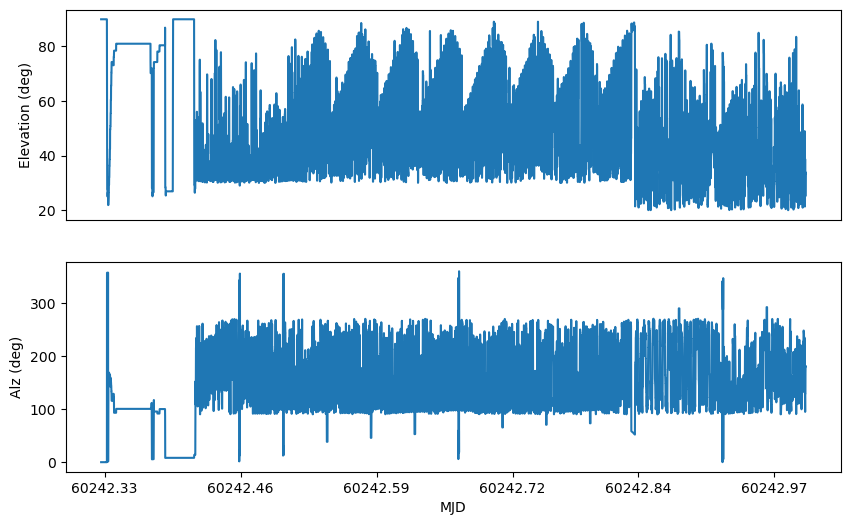

Telescope elevation limit is 20.012152065095375


In [609]:
# plt.figure()
# plt.
# plt.hist2d(tel_el,tel_az,bins=50)
# plt.show()
tickpoints=np.arange(0,max_epoch,7000)
freqticks=np.arange(0,nchan,500)

plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(mjd,tel_el)
plt.xticks([],[])
# plt.xticks(np.round(mjd[tickpoints],2),np.round(mjd[tickpoints],2))
plt.ylabel("Elevation (deg)")
plt.subplot(212)
plt.plot(mjd,tel_az)
plt.ylabel("Alz (deg)")
plt.xlabel('MJD')
plt.xticks(np.round(mjd[tickpoints],2),np.round(mjd[tickpoints],2))
plt.savefig('observation_track')
plt.show()
print(f'Telescope elevation limit is {np.min(tel_el)}')


### Animation of satellite positions (also check and see if projection map works better)

<IPython.core.display.Javascript object>


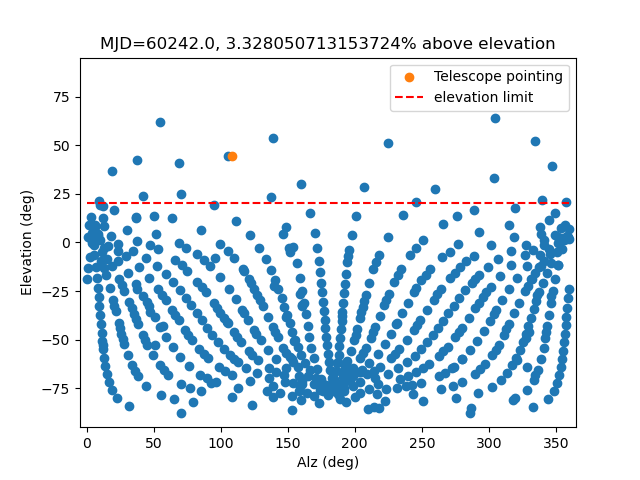

MovieWriter ffmpeg unavailable; using Pillow instead.


In [771]:
%matplotlib notebook
time=0
fig=plt.figure()
ax=plt.subplot()
plt.title(f'MJD={mjd[time]}')
plt.scatter(sat_az[time],sat_el[time])
plt.scatter(tel_az[time],tel_el[time],label='Telescope pointing')
plt.plot([0,360],[20,20],'--',label="elevation limit",color='red')
plt.xlabel("Alz (deg)")
plt.ylabel("Elevation (deg)")
plt.xlim(-5,365)
plt.ylim(-95,95)
plt.legend(loc=1)
x=np.arange(1,10000,100)

def animate(i):
    ax.clear()
    skyrate=np.sum(sat_el[i]>20)/nsat
    
    plt.title(f'MJD={np.round(mjd[i])}, {skyrate*100}% above elevation')
    plt.scatter(sat_az[i],sat_el[i],c='C0')
    plt.scatter(tel_az[i],tel_el[i],label='Telescope pointing',color='C1')
    plt.plot([0,360],[20,20],'--',label="elevation limit",color='red')
    plt.xlabel("Alz (deg)")
    plt.ylabel("Elevation (deg)")
    plt.xlim(-5,365)
    plt.ylim(-95,95)
    plt.legend(loc=1)

ani = animation.FuncAnimation(fig,animate,repeat=False,frames=x)
ani.save("satellitetracks.gif",fps=30)
plt.show()

<IPython.core.display.Javascript object>


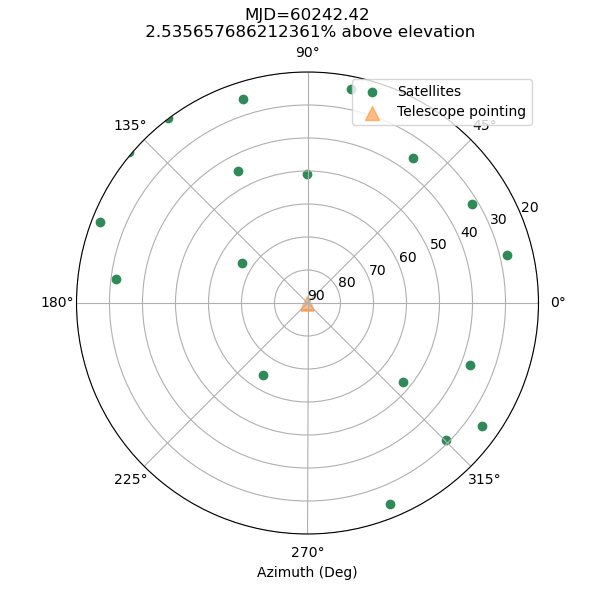

MovieWriter ffmpeg unavailable; using Pillow instead.


In [786]:
%matplotlib notebook
# animation script
from matplotlib import animation
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')
ax.set_ylim(90,20)
skyrate=np.sum(sat_el[0]>20)/nsat
ax.set_title(f'MJD={np.round(mjd[0],2)}\n {skyrate*100}% above elevation')

ax.scatter(sat_az[0], sat_el[0], c="seagreen")
ax.scatter(tel_az[0], tel_el[0], c="C1")

ax.set_title("Pretty polar error bars")
x=np.arange(0,20000,600)
def animate(i):
    skyrate=np.sum(sat_el[i]>20)/nsat
    ax.clear()
    ax.set_title(f'MJD={np.round(mjd[i],2)}\n {skyrate*100}% above elevation')
    ax.set_ylim(90,20)
    ax.scatter(sat_az[i],sat_el[i],color='seagreen',label='Satellites') 
    ax.scatter(tel_az[i],tel_el[i],marker='^',color='C1',s=100,alpha=0.5,label='Telescope pointing')
    ax.set_xlabel('Azimuth (Deg)')
    ax.legend(loc=1)
    
ani = animation.FuncAnimation(fig,animate,repeat=False,frames=x)
ani.save("satellitetracks.gif",fps=10)
plt.show()
    
        

### baseline calibration

5.534185284550584e-06


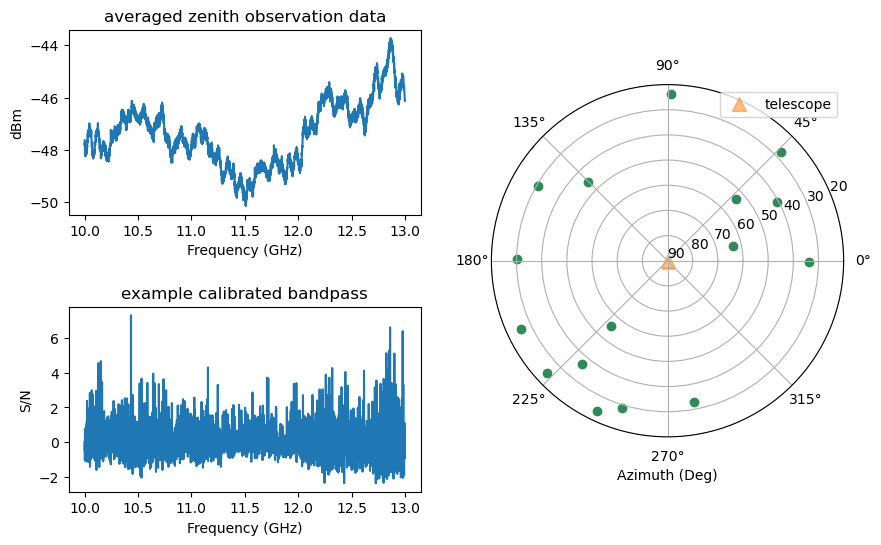

In [787]:
%matplotlib inline
gs = GridSpec(2,2,hspace=0.5)
i=0
plt.figure(figsize=(10,6))
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax3= plt.subplot(gs[:,1],projection='polar')

bandpass=np.mean(data[0:100],axis=0)
exampledata=data[i]

ax1.set_title('averaged zenith observation data')
# ax1.plot(f_GHz,exampledata)
ax1.plot(f_GHz,bandpass)
ax1.set_ylabel("dBm")
ax1.set_xlabel('Frequency (GHz)')
# ax1.set_ylim(-53,-36)
ax2.set_title('example calibrated bandpass')
stdnoise=np.std(convertdbm(exampledata)-convertdbm(bandpass))
print(stdnoise)
ax2.plot(f_GHz,(convertdbm(exampledata)-convertdbm(bandpass))/stdnoise)
ax2.set_ylabel("S/N")
ax2.set_xlabel('Frequency (GHz)')
# ax2.set_ylim(-5,20)
ax3.set_ylim(90,20)
ax3.scatter(sat_az[i],sat_el[i],color='seagreen') 
ax3.scatter(tel_az[i],tel_el[i],marker='^',color='C1',s=100,alpha=0.5,label='telescope')
ax3.set_xlabel('Azimuth (Deg)')
# plt.ylabel('Elevation (Deg)')
ax3.legend(loc=1)
plt.savefig("baselinecalibration.png")
plt.show()

### waterfall statistics

In [727]:
### calibrate baseline
baseline=np.zeros(np.shape(data))
# print(max_epoch,baseline.shape)
for i in range(max_epoch):
    baseline[i]=bandpass
data_baseline=(convertdbm(data)-convertdbm(baseline))/stdnoise



36392 (36392, 3001)


### plot waterfall plot

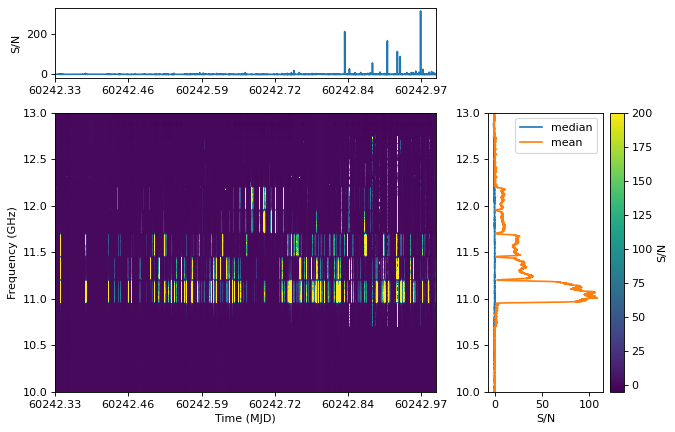

In [738]:
### plot waterfall plot

fig = plt.figure(figsize=(9, 6),dpi=80)
gs = GridSpec(2,2,width_ratios=(4, 1.5), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.2)
ax1 = plt.subplot(gs[1,0])
img=ax1.imshow(data_baseline.T,aspect='auto',vmin=-5,vmax=200,origin='lower')
plt.xlabel('Time (MJD)')
plt.xticks(tickpoints,np.round(mjd[tickpoints],2))
plt.ylabel('Frequency (GHz)')
plt.yticks(freqticks,f_GHz[freqticks])

ax_histx = plt.subplot(gs[0,0],sharex=ax1)
# ax_histx.set_xticks([],[])
ax_histx.set_ylabel('S/N')
ax_histx.plot(np.median(data_baseline,1),label='median')
# ax_histx.set_yscale('log')
ax_histy = plt.subplot(gs[1,1],sharey=ax1)
ax_histy.plot(np.median(data_baseline,0),np.arange(nchan),label='median')
ax_histy.plot(np.mean(data_baseline,0),np.arange(nchan),label='mean')
ax_histy.set_xlabel('S/N')
ax_histy.legend()


# ax_histy.set_yticks([],[])
cbar=fig.colorbar(img,ax=ax_histy)
cbar.set_label('S/N')

plt.savefig('detectionwaterfall_linear')
plt.show()

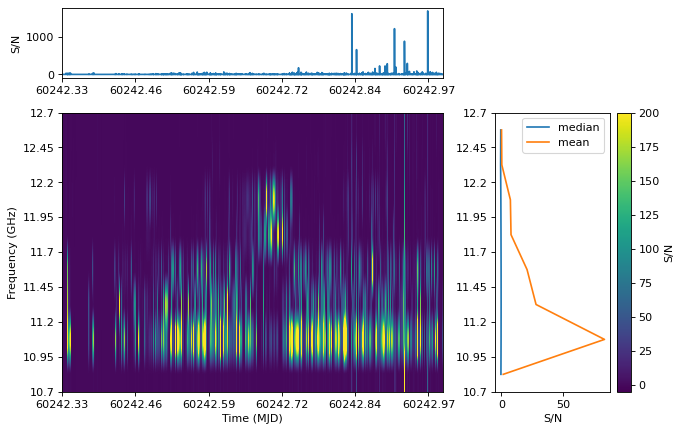

In [739]:
scrn_bw=250
scrn_nchan=(12.7-10.7)/0.001//scrn_bw
data_fscrunched=data_baseline[:,700:2700]
data_fscrunched=data_fscrunched.reshape(len(data_fscrunched),-1,scrn_bw).mean(2)
fig = plt.figure(figsize=(9, 6),dpi=80)
gs = GridSpec(2,2,width_ratios=(4, 1.5), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.2)
ax1 = plt.subplot(gs[1,0])
img=ax1.imshow(data_fscrunched.T,aspect='auto',vmin=-5,vmax=200,origin='lower')
yticks=np.arange(0,scrn_nchan+1,scrn_nchan//5)
plt.xlabel('Time (MJD)')
plt.xticks(tickpoints,np.round(mjd[tickpoints],2))
plt.ylabel('Frequency (GHz)')
plt.yticks(yticks-0.5,10.7+0.25*yticks)
ax_histx = plt.subplot(gs[0,0],sharex=ax1)
# ax_histx.set_xticks([],[])
ax_histx.set_ylabel('S/N')
ax_histx.plot(np.median(data_fscrunched,1),label='median')
# ax_histx.set_yscale('log')
ax_histy = plt.subplot(gs[1,1],sharey=ax1)
ax_histy.plot(np.median(data_fscrunched,0),np.arange(scrn_nchan),label='median')
ax_histy.plot(np.mean(data_fscrunched,0),np.arange(scrn_nchan),label='mean')
ax_histy.set_xlabel('S/N')
ax_histy.legend()


# ax_histy.set_yticks([],[])
cbar=fig.colorbar(img,ax=ax_histy)
cbar.set_label('S/N')

plt.savefig('detectionwaterfall_linear_fscrunched')
plt.show()

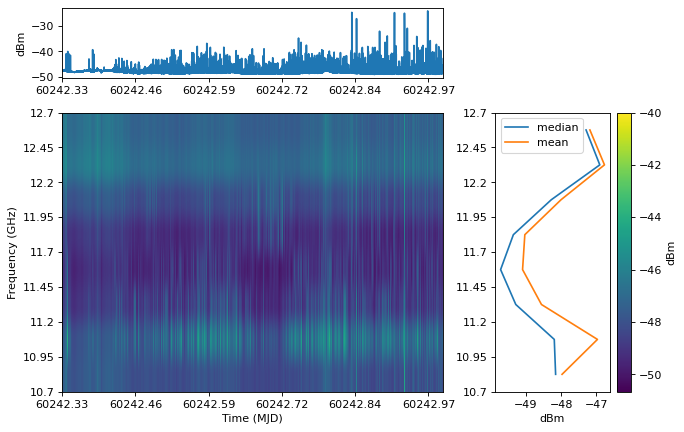

In [740]:
data_fscrunched=data[:,700:2700]
data_fscrunched=data_fscrunched.reshape(len(data_fscrunched),-1,scrn_bw).mean(2)
fig = plt.figure(figsize=(9, 6),dpi=80)
gs = GridSpec(2,2,width_ratios=(4, 1.5), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.2)
ax1 = plt.subplot(gs[1,0])
img=ax1.imshow(data_fscrunched.T,aspect='auto',vmax=-40,origin='lower')
yticks=np.arange(0,scrn_nchan+1,scrn_nchan//5)
plt.xlabel('Time (MJD)')
plt.xticks(tickpoints,np.round(mjd[tickpoints],2))
plt.ylabel('Frequency (GHz)')
plt.yticks(yticks-0.5,10.7+0.25*yticks)
ax_histx = plt.subplot(gs[0,0],sharex=ax1)
# ax_histx.set_xticks([],[])
ax_histx.set_ylabel('dBm')
ax_histx.plot(np.median(data_fscrunched,1),label='median')
# ax_histx.set_yscale('log')
ax_histy = plt.subplot(gs[1,1],sharey=ax1)
ax_histy.plot(np.median(data_fscrunched,0),np.arange(scrn_nchan),label='median')
ax_histy.plot(np.mean(data_fscrunched,0),np.arange(scrn_nchan),label='mean')
ax_histy.set_xlabel('dBm')
ax_histy.legend()


# ax_histy.set_yticks([],[])
cbar=fig.colorbar(img,ax=ax_histy)
cbar.set_label('dBm')

plt.savefig('detectionwaterfall_dBm_fscrunched')
plt.show()

### RFI affected fraction

50 percentile 232.0


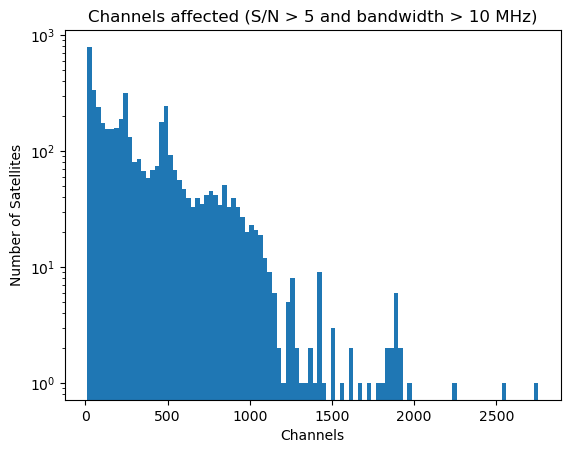

In [788]:
# bad_chans=np.sum(data_baseline>10,1)
# print(bad_chans.shape)
# plt.plot(bad_chans)
# plt.show()
print('50 percentile',np.percentile(bad_chans[bad_chans>10],50))
badchans=plt.hist((bad_chans[bad_chans>10]),bins=100)
plt.title('Channels affected (S/N > 5 and bandwidth > 10 MHz)')
plt.xlabel('Channels')
plt.ylabel('Number of Satellites')
plt.yscale('log')
plt.savefig('nchan_hist')
plt.show()

### cross match for detections

In [302]:
%matplotlib inline

from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.constants as c
### 13.2m dish
wavelen=3e8*u.m/u.s/(f_GHz[0]*1e9/u.s) ## 10 GHz is 3cm
print(wavelen)
beamsize=wavelen/(13.2*u.m)/np.pi*180*u.deg  ### radian --> deg
print(f"estimate 13.2m single dish beamsize at lowest frequency 10 GHz is {beamsize}")
max_sep=beamsize


0.03 m
estimate 13.2m single dish beamsize at lowest frequency 10 GHz is 0.13021768071155074 deg


In [671]:
crossmatch_results=[]
# for i in range(max_epoch):
#     catalog = SkyCoord(ra=sat_az[i]*u.degree, dec=sat_el[i]*u.degree)
#     telescope = SkyCoord(ra=tel_az[i]*u.degree, dec= tel_el[i]*u.degree)
#     idx, d2d, d3d = telescope.match_to_catalog_sky(catalog)
#     mask=d2d<max_sep
#     if d2d<max_sep:
#         maxflux=np.max(data[i])
#         channelmax=np.argmax(data[i])
#         print(i,mjd[i],idx,d2d,maxflux,f_GHz[channelmax])
#         crossmatch_results.append(i)
# crossmatch_results=np.array(crossmatch_results)    

nsat=631
cone=max_sep*5
print(f"searchcone radius = {cone}")
## new search to cover all sources within beam range
for i in range(max_epoch):
    catalog = SkyCoord(ra=sat_az[i]*u.degree, dec=sat_el[i]*u.degree)
    telescope = SkyCoord(ra=tel_az[i]*u.degree, dec= tel_el[i]*u.degree)
    angulardistance = catalog.separation(telescope)
    mask= angulardistance<cone ## search for 10 sigma sidelobes
    maxflux=np.max(data[i])
    channelmax=np.argmax(data[i])
    snrspec=(convertdbm(data[i])-convertdbm(bandpass))/stdnoise
    maxsnr=np.max(snrspec)
    badchan=np.sum(snrspec>5)
    if sum(mask)>0:
#         print(np.where(mask)[0])
        for j in np.arange(nsat)[mask]:
            dist=sat_range[i,j]
#             print(i,mjd[i],j,angulardistance[j],np.round(maxflux,2),np.round(f_GHz[channelmax],3),np.round(dist,2))
            crossmatch_results.append([i,mjd[i],j,angulardistance[j].value,maxflux,f_GHz[channelmax],dist,maxsnr,badchan])

searchcone radius = 0.6510884035577537 deg


### create crossmatch catalogue

In [784]:
import pandas as pd
xmatch=pd.DataFrame(crossmatch_results,
                    columns=['epoch','MJD','sat_index','ang_sep','flux_pk','pk_channel','distance','max_sn','bad_chans'])
# print(xmatch)


<IPython.core.display.Javascript object>


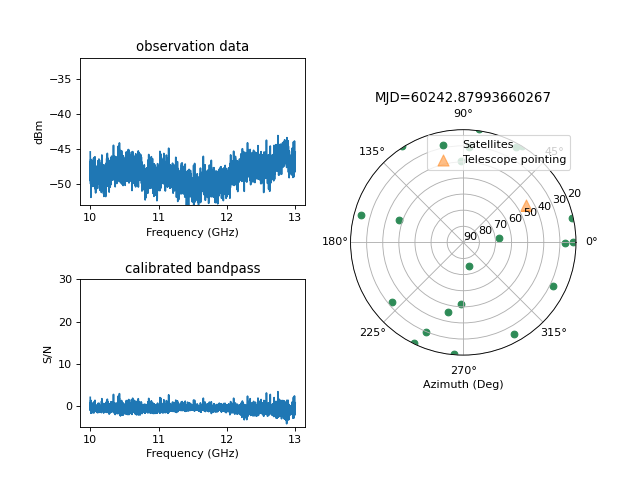

MovieWriter Pillow unavailable; using Pillow instead.


In [300]:
%matplotlib notebook
# animation script


fig = plt.figure(figsize=(8, 6),dpi=80)
gs = GridSpec(2,2,hspace=0.5)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax3= plt.subplot(gs[:,1],projection='polar')

ax1.plot(f_GHz,data[0])
ax1.set_ylim(-53,-32)
ax1.set_ylabel("dBm")
ax1.set_xlabel('Frequency (GHz)')

ax2.set_title('calibrated bandpass')
# stdnoise=np.std(10**(data[0]-bandpass))
ax2.plot(f_GHz,(data[0]-bandpass)/stdnoise)
ax2.set_ylabel("Log S/N")
ax2.set_xlabel('Frequency (GHz)')

ax3.set_ylim(90,20)
ax3.scatter(sat_az[0], sat_el[0], c="seagreen")
ax3.scatter(tel_az[0], tel_el[0],marker='^',color='C1',s=100,alpha=0.5,label='telescope')
x=np.arange(1,30000,100)
ax3.legend(loc=1)

def animate(i):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax1.set_title('observation data')

    ax1.plot(f_GHz,data[i])
    ax1.set_ylabel("dBm")
    ax1.set_xlabel('Frequency (GHz)')
    ax1.set_ylim(-53,-32)
    ax2.set_title('calibrated bandpass')
    ax2.plot(f_GHz,(convertdbm(data[i])-convertdbm(bandpass))/stdnoise)
    ax2.set_ylabel("S/N")
    ax2.set_xlabel('Frequency (GHz)')
    ax2.set_ylim(-5,30)
    ax3.set_title(f"MJD={mjd[i]}")
    ax3.set_ylim(90,20)
    ax3.scatter(sat_az[i],sat_el[i],color='seagreen',label='Satellites') 
    ax3.scatter(tel_az[i],tel_el[i],marker='^',color='C1',s=100,alpha=0.5,label='Telescope pointing')
    ax3.set_xlabel('Azimuth (Deg)')
    ax3.legend(loc=1)
ani = animation.FuncAnimation(fig,animate,repeat=False,frames=x)
ani.save("tracking.gif", writer='Pillow',fps=10)

plt.show()

### Analysis and Statistics

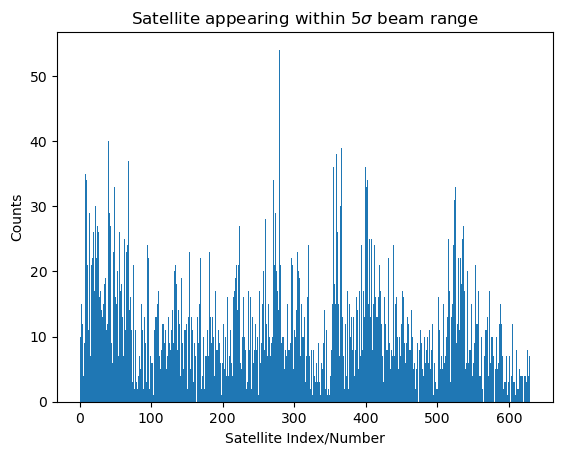

average detection 11.787301587301588 fraction of satellites with > 10 detections 0.47619047619047616
satellites missing: 12


In [796]:
%matplotlib inline
histo=plt.hist(xmatch.sat_index,bins=630)
plt.title('Satellite appearing within 5$\\sigma$ beam range')
plt.xlabel('Satellite Index/Number')
plt.ylabel('Counts')
plt.savefig('crosscount_raw')
plt.show()
missing=np.where(histo[0]==0)
print('average detection',np.mean(histo[0]),'fraction of satellites with > 10 detections',np.sum(histo[0]>10)/630)
print("satellites missing:",len(missing[0]))

36392


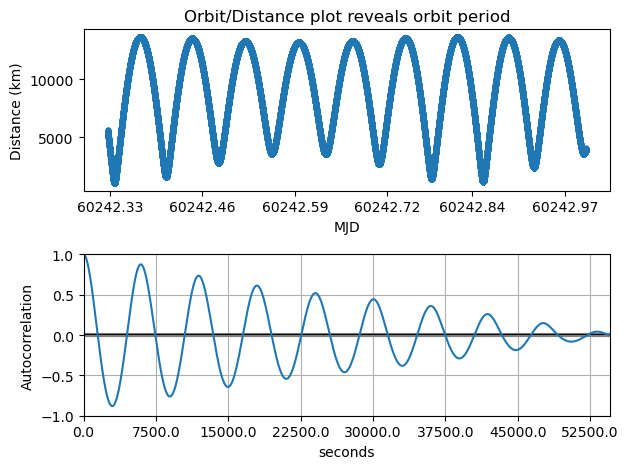

In [414]:

sat_list=np.unique(xmatch.sat_index,return_counts=True)

i=508

mask=(xmatch.sat_index==i)

time=xmatch.MJD[mask]
signal=xmatch.flux_pk[mask]
ang=xmatch.ang_sep[mask]
dist=xmatch.distance[mask]
plt.subplot(211)
plt.title("Orbit/Distance plot reveals orbit period")

plt.plot(mjd,sat_range[:,i],'.-')
plt.xticks(np.round(mjd[tickpoints],2),np.round(mjd[tickpoints],2))
plt.ylabel('Distance (km)')
plt.xlabel('MJD')
plt.subplot(212)
print(len(sat_range[:,i]))
y=pd.plotting.autocorrelation_plot(sat_range[:,i])
plt.xticks(np.arange(0,35001,5000),np.round(np.arange(0,35001,5000)*tsamp,0))
plt.xlabel('seconds')
plt.tight_layout()
plt.savefig('orbitdistance')
plt.show()

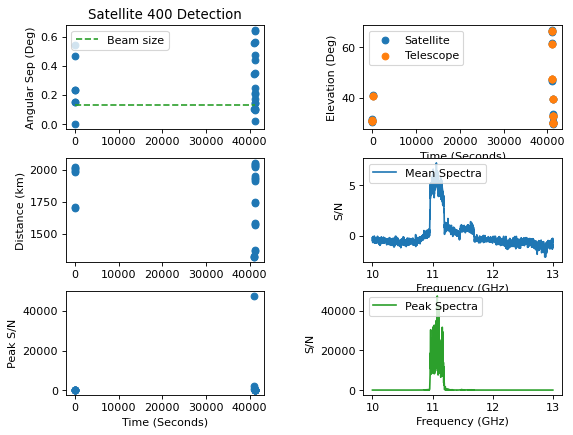

In [770]:
i=400

mask=(xmatch.sat_index==i)*(xmatch.max_sn>5)

epochs=xmatch.epoch[mask]
time=xmatch.MJD[mask]
time=(time.values-time.values[0])*24*3600
signal=xmatch.flux_pk[mask]
ang=xmatch.ang_sep[mask]
dist=xmatch.distance[mask]
sn=xmatch.max_sn[mask]
fig = plt.figure(figsize=(8, 6),dpi=80)
gs = GridSpec(6,2,hspace=0.8,wspace=0.5)
ax1=plt.subplot(gs[0:2,0])
ax2=plt.subplot(gs[2:4,0],sharex=ax1)
ax3=plt.subplot(gs[4:6,0],sharex=ax1)
ax4=plt.subplot(gs[0:2,1],sharex=ax1)
ax5=plt.subplot(gs[2:4,1])
ax6=plt.subplot(gs[4:6,1])


ax1.scatter(time,ang)
ax1.plot(time,time*0+beamsize,'--',color='C2',label='Beam size')
ax1.set_ylabel('Angular Sep (Deg)')
ax1.legend(loc=2)
ax2.scatter(time,dist)
ax2.set_ylabel('Distance (km)')

ax3.scatter(time,sn)
ax3.set_ylabel('Peak S/N')
ax3.set_xlabel('Time (Seconds)')

ax4.scatter(time,sat_el[epochs,i],label='Satellite')
ax4.scatter(time,tel_el[epochs],label='Telescope')
ax4.set_ylabel('Elevation (Deg)')

ax4.legend(loc=2)
ax4.set_xlabel('Time (Seconds)')
peakidx=np.argmax(sn.values)
# print(peakidx,epochs.values[peakidx])
peakdist=sat_range[epochs.values[peakidx],i]
# print(peakdist)
spectra=data[epochs[mask]].mean(0)
peakspectra=data[epochs.values[peakidx]]
spectra=(convertdbm(spectra)-convertdbm(bandpass))/stdnoise
peakspectra=(convertdbm(peakspectra)-convertdbm(bandpass))/stdnoise

ax5.plot(f_GHz,spectra,label='Mean Spectra')
ax5.set_xlabel('Frequency (GHz)')
ax5.set_ylabel('S/N')
ax5.legend(loc=2)

ax6.plot(f_GHz,peakspectra,color='C2',label='Peak Spectra')


ax6.set_xlabel('Frequency (GHz)')
ax6.set_ylabel('S/N')
# ax6.set_yscale("log")
ax6.legend(loc=2)

# secax=ax.twinx()
# secax.plot(time,ang.values)
ax1.set_title(f'Satellite {i} Detection')

plt.savefig('satellite detection example')
plt.show()
# print(epochs)

### Histogram analysis

In [755]:
avg_sn=[]
Ndet=histo[0]
sig_frac=[]
avg_dist=[]
max_el=[]
max_az=[]

for i in range(630):
    mask=(xmatch.sat_index==i)
    epochs=xmatch.epoch[mask]
    time=xmatch.MJD[mask]
    signal=xmatch.flux_pk[mask]
    ang=xmatch.ang_sep[mask]
    dist=xmatch.distance[mask]
    sn=xmatch.max_sn[mask]

    if np.sum(mask)>0:
        peakidx=np.argmax(sn)
        peakdist=sat_range[epochs.values[peakidx],i]
        peakel=sat_el[epochs.values[peakidx],i]
        peakaz=sat_az[epochs.values[peakidx],i]
        sig_frac.append(np.sum(sn>10))
        avg_sn.append(np.max(sn))
        avg_dist.append(peakdist)
        max_az.append(peakaz)
        max_el.append(peakel)

    else:
        sig_frac.append(0)
        avg_sn.append(0)
        avg_dist.append(0)
        max_az.append(0)
        max_el.append(0)
        
sig_frac=np.array(sig_frac)
avg_sn=np.array(avg_sn)
avg_dist=np.array(avg_dist)
max_el=np.array(max_el)
max_az=np.array(max_az)



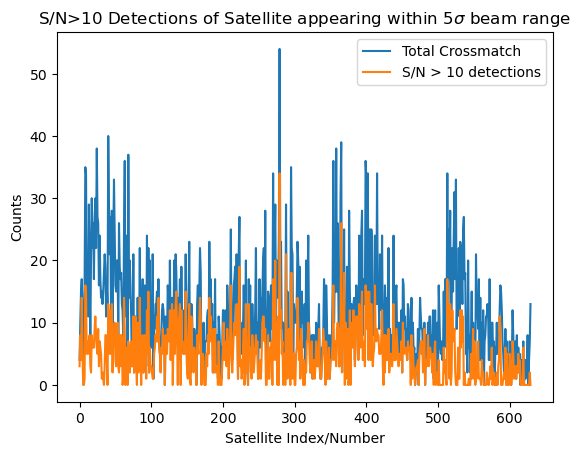

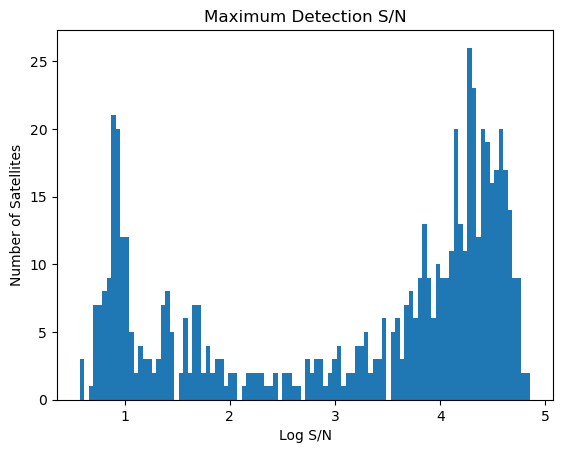

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
average time over 10 sigma is 7.845786963434022 seconds
average effective fraction of observations 0.4792610047891339 
average effective fraction of satellites with Log(S/N) >3 400.0, 398
median max S/N 6925.273580107269 


In [768]:
plt.title('S/N>10 Detections of Satellite appearing within 5$\\sigma$ beam range')
histobars=histo[0]
plt.plot(histo[1][:-1],histo[0],label='Total Crossmatch')
plt.plot(histo[1][:-1],sig_frac,label='S/N > 10 detections')
plt.xlabel('Satellite Index/Number')
plt.ylabel('Counts')
plt.legend()
plt.savefig('crosscount_10sigma')
plt.show()

snlog=plt.hist(np.log10(avg_sn[avg_sn>0]),bins=100)
# snlog2=plt.hist(np.log10(avg_sn[avg_sn>10**3]))

plt.title('Maximum Detection S/N')
plt.xlabel('Log S/N')
plt.ylabel('Number of Satellites')
# plt.xscale('log')
plt.savefig('snmax_hist')
plt.show()

mask7=(snlog[1]>3)
print(mask7)
print(f"average time over 10 sigma is {np.mean(sig_frac[:-1])*1.5} seconds")
print(f"average effective fraction of observations {np.mean(sig_frac[histobars>0]/histobars[histobars>0])} ")
print(f"average effective fraction of satellites with Log(S/N) >3 {np.sum(snlog[0][mask7[1:]])}, {np.sum(avg_sn>10**3)}")

print(f"median max S/N {np.median(avg_sn)} ")


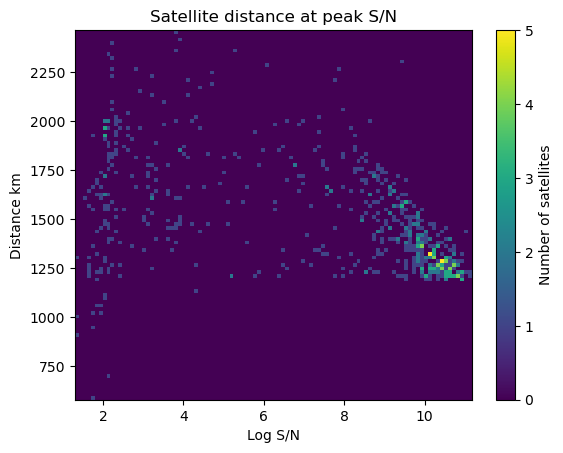

In [565]:
plt.title('Satellite distance at peak S/N')
plt.hist2d(x=np.log10(avg_sn[avg_sn>0]),y=(avg_dist[avg_sn>0]),bins=100)
plt.xlabel('Log S/N')
plt.ylabel('Distance km')
cbar=plt.colorbar()
cbar.set_label('Number of satellites')
plt.savefig('corr_peaksn_dist')
plt.show()

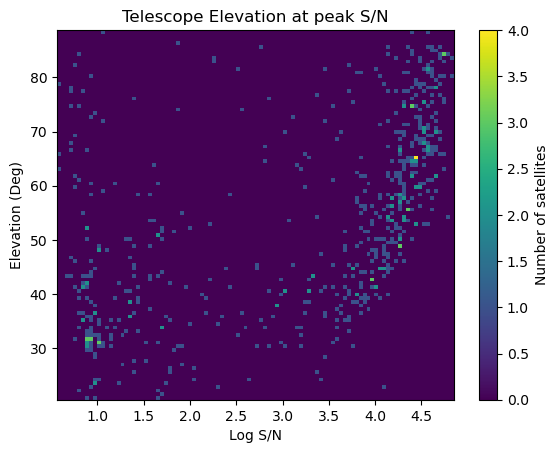

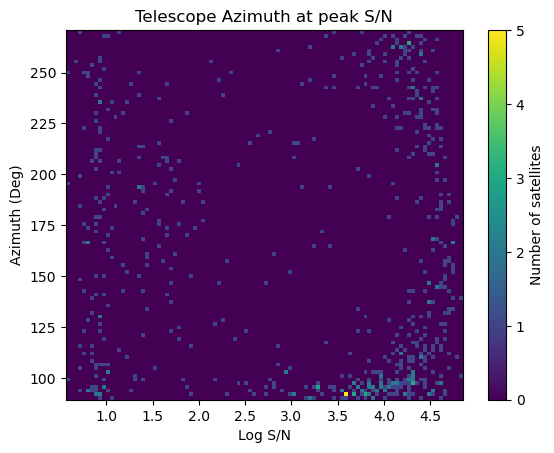

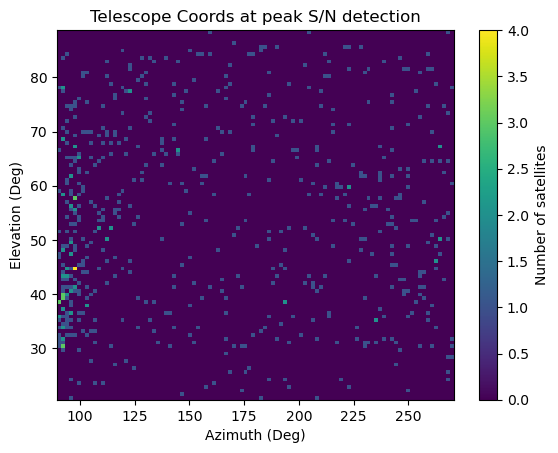

In [661]:
plt.title('Telescope Elevation at peak S/N')
plt.hist2d(x=np.log10(avg_sn[avg_sn>0]),y=(max_el[avg_sn>0]),bins=100)
plt.xlabel('Log S/N')
plt.ylabel('Elevation (Deg)')
cbar=plt.colorbar()
cbar.set_label('Number of satellites')
plt.savefig('corr_peaksn_el')
plt.show()
plt.title('Telescope Azimuth at peak S/N')
plt.hist2d(x=np.log10(avg_sn[avg_sn>0]),y=(max_az[avg_sn>0]),bins=100)
plt.xlabel('Log S/N')
plt.ylabel('Azimuth (Deg)')
cbar=plt.colorbar()
cbar.set_label('Number of satellites')
plt.savefig('corr_peaksn_az')
plt.show()

plt.title('Telescope Coords at peak S/N detection')
plt.hist2d(x=(max_az[avg_sn>0]),y=(max_el[avg_sn>0]),bins=100)
plt.xlabel('Azimuth (Deg)')
plt.ylabel('Elevation (Deg)')
cbar=plt.colorbar()
cbar.set_label('Number of satellites')
plt.savefig('corr_az_el')
plt.show()